In [1]:
# Dependencies
import nfl_data_py as nfl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Years to load
years = range(1999, 2023)

In [3]:
# Load data
data = nfl.import_pbp_data(years)

1999 done.
2000 done.
2001 done.
2002 done.
2003 done.
2004 done.
2005 done.
2006 done.
2007 done.
2008 done.
2009 done.
2010 done.
2011 done.
2012 done.
2013 done.
2014 done.
2015 done.
2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
Downcasting floats.


In [4]:
# Create a DataFrame of passer_player_name, season
qb_pass_attempts = data.query('play_type == "pass"')\
    .groupby(['passer_player_name', 'season'])\
        .size().reset_index(name='pass_attempts')

# Filter to QBs with at least 100 pass attempts
qb_pass_attempts = qb_pass_attempts.query('pass_attempts >= 100')

In [5]:
qb_pass_attempts

,passer_player_name,season,pass_attempts
13,A.Brooks,2000,288
14,A.Brooks,2001,610
15,A.Brooks,2002,568
16,A.Brooks,2003,549
17,A.Brooks,2004,585
...,...,...,...
2571,V.Young,2011,122
2585,Z.Mettenberger,2014,197
2586,Z.Mettenberger,2015,179
2589,Z.Wilson,2021,429


In [6]:
# Create a DataFrame of rusher_player_name, season, epa and create a column for rush attempts
rushers = data.query('play_type == "run"')\
    .groupby(['rusher_player_name', 'season'])\
        .agg({'epa': 'mean', 'play_id': 'count'})\
            .reset_index()\
                .rename(columns={'play_id': 'rush_attempts'})

In [7]:
# Join the DataFrames on passer_player_name and rusher_player_name
qb_scrambles = qb_pass_attempts.merge(rushers, left_on=['passer_player_name', 'season'], right_on=['rusher_player_name', 'season'])

In [8]:
qb_scrambles

,passer_player_name,season,pass_attempts,rusher_player_name,epa,rush_attempts
0,A.Brooks,2000,288,A.Brooks,-0.050772,56
1,A.Brooks,2001,610,A.Brooks,-0.174363,80
2,A.Brooks,2002,568,A.Brooks,0.197814,55
3,A.Brooks,2003,549,A.Brooks,-0.211801,46
4,A.Brooks,2004,585,A.Brooks,0.053914,47
...,...,...,...,...,...,...
1076,V.Young,2011,122,V.Young,0.073027,15
1077,Z.Mettenberger,2014,197,Z.Mettenberger,1.484805,1
1078,Z.Mettenberger,2015,179,Z.Mettenberger,0.152336,5
1079,Z.Wilson,2021,429,Z.Wilson,0.292807,26


In [9]:
# Drop passer_player_name, pass_attempts
qb_scrambles = qb_scrambles.drop(columns=['passer_player_name', 'pass_attempts'])

In [10]:
qb_scrambles

,season,rusher_player_name,epa,rush_attempts
0,2000,A.Brooks,-0.050772,56
1,2001,A.Brooks,-0.174363,80
2,2002,A.Brooks,0.197814,55
3,2003,A.Brooks,-0.211801,46
4,2004,A.Brooks,0.053914,47
...,...,...,...,...
1076,2011,V.Young,0.073027,15
1077,2014,Z.Mettenberger,1.484805,1
1078,2015,Z.Mettenberger,0.152336,5
1079,2021,Z.Wilson,0.292807,26


In [11]:
df = qb_scrambles.copy()

In [12]:
# create a new column indicating whether the player also had at least 20 attempts in the following year
# df['next_year_attempts'] = df.groupby('rusher_player_name')[
#     'rush_attempts'].shift(-1)

# # filter for rows where the player also had at least 20 attempts in the following year
# df = df[df['next_year_attempts'] >= 20]

# #drop the 'next_year_attempts' column as it's no longer needed
# df = df.drop(columns='next_year_attempts')

In [13]:
df[df['rusher_player_name'] == 'J.Fields']

,season,rusher_player_name,epa,rush_attempts
473,2021,J.Fields,0.123468,67
474,2022,J.Fields,0.472153,151


In [14]:
# sort by player and then by season to make sure the data is in the right order
df = df.sort_values(['rusher_player_name', 'season'])

# create a new dataframe with the current year and the following year's EPA for each player
df_comparison = df.copy()
df_comparison['next_year_epa'] = df_comparison.groupby('rusher_player_name')[
    'epa'].shift(-1)

# Add next season column
df_comparison['next_season'] = df_comparison.groupby('rusher_player_name')[
    'season'].shift(-1)

# drop the last season for each player (since there is no "next year" data for the last season)
df_comparison = df_comparison.dropna(subset=['next_year_epa'])


In [15]:
df_comparison[df_comparison['rusher_player_name'] == 'J.Fields']

,season,rusher_player_name,epa,rush_attempts,next_year_epa,next_season
473,2021,J.Fields,0.123468,67,0.472153,2022.0


In [16]:
df_comparison

,season,rusher_player_name,epa,rush_attempts,next_year_epa,next_season
0,2000,A.Brooks,-0.050772,56,-0.174363,2001.0
1,2001,A.Brooks,-0.174363,80,0.197814,2002.0
2,2002,A.Brooks,0.197814,55,-0.211801,2003.0
3,2003,A.Brooks,-0.211801,46,0.053914,2004.0
4,2004,A.Brooks,0.053914,47,0.297267,2005.0
...,...,...,...,...,...,...
1073,2007,V.Young,0.033678,80,0.197577,2009.0
1074,2009,V.Young,0.197577,47,-0.104825,2010.0
1075,2010,V.Young,-0.104825,18,0.073027,2011.0
1077,2014,Z.Mettenberger,1.484805,1,0.152336,2015.0


In [17]:
# filter to where there are at least 20 attempts
df_comparison = df_comparison[df_comparison['rush_attempts'] >= 45]

In [18]:
# print where rusher_player_name is 'Justin Fields'
df_comparison['rusher_player_name'].value_counts()

R.Wilson      9
C.Newton      9
A.Rodgers     7
A.Smith       7
M.Vick        7
             ..
M.Moore       1
D.Flutie      1
M.Brunell     1
J.Kitna       1
M.Trubisky    1
Name: rusher_player_name, Length: 63, dtype: int64

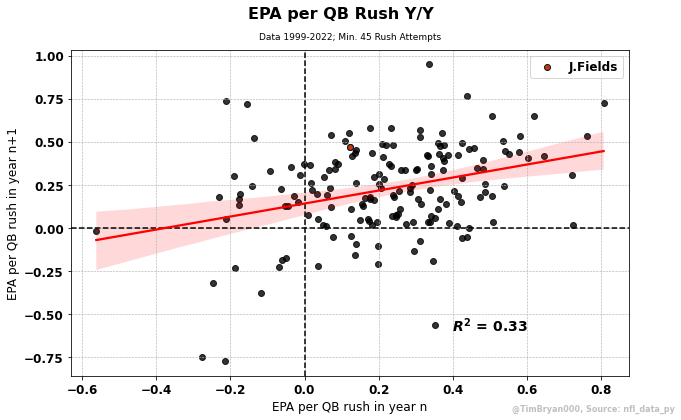

In [19]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom font
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 12}
mpl.rc('font', **font)

# Create a scatter plot with EPA in year n on the x-axis and EPA in year n+1 on the y-axis
plt.figure(figsize=(10, 6))

# Add title and labels
plt.suptitle('EPA per QB Rush Y/Y', fontsize=16, fontweight='bold')

# Add subtitle, smaller and centered
plt.title('Data 1999-2022; Min. 45 Rush Attempts', fontsize=9, loc='center', pad=10)

# Add a vertical line at 0
plt.axvline(x=0, color='black', linestyle='--')

# Add a horizontal line at 0
plt.axhline(y=0, color='black', linestyle='--')

# Create a grid
plt.grid(True, which='both', linestyle='--', linewidth=0.6)

# Add a trendline using seaborn's regplot
sns.regplot(x='epa', y='next_year_epa', data=df_comparison, scatter_kws={"color": "black"}, line_kws={"color": "red"})

plt.ylabel('EPA per QB rush in year n+1')
plt.xlabel('EPA per QB rush in year n')

# Calculate the correlation coefficient
r2 = df_comparison['epa'].corr(df_comparison['next_year_epa']).round(2)

# Write the correlation coefficient on the plot
plt.text(x=0.5, y=-0.6, s=f'$R^2$ = {r2}', fontsize=14, ha='center')

# Highlight the point where rusher_player_name is 'J.Fields' with #c83803 on the inside of the dot and #0b162a on the outside
plt.scatter(df_comparison[df_comparison['rusher_player_name'] == 'J.Fields']['epa'],
            df_comparison[df_comparison['rusher_player_name'] == 'J.Fields']['next_year_epa'],
            color='#c83803',
            edgecolors='#0b162a',
            label='J.Fields')

# Add a watermark
plt.text(0.85, 0.05, '@TimBryan000, Source: nfl_data_py', fontsize=8, color='gray', ha='center', va='center', alpha=0.5, transform=plt.gcf().transFigure)

# Add a legend
plt.legend(loc='best')

# Save the plot as a high-quality image
plt.savefig('my_plot.png', dpi=300)

# Show the plot
plt.show()